<a href="https://colab.research.google.com/github/IreneMuthoni/Portfolio-Projects/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [83]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/movies.csv")

In [84]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40000,"927,000.00000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00000","46,998,772.00000",Warner Bros.,146.00000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80000,"65,000.00000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00000","58,853,106.00000",Columbia Pictures,104.00000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70000,"1,200,000.00000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00000","538,375,067.00000",Lucasfilm,124.00000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70000,"221,000.00000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00000","83,453,539.00000",Paramount Pictures,88.00000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30000,"108,000.00000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00000","39,846,344.00000",Orion Pictures,98.00000


In [85]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [86]:
df = df.dropna()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [88]:
#Suppress scientific notation in .describe() output
pd.options.display.float_format = '{:20,.2f}'.format
df.describe()

,year,score,votes,budget,gross,runtime
count,"5,421.00","5,421.00","5,421.00","5,421.00","5,421.00","5,421.00"
mean,"2,001.66",6.39,"115,066.13","36,009,170.47","103,229,653.33",108.15
std,10.54,0.96,"184,407.26","41,573,373.99","187,302,717.15",18.12
min,"1,980.00",1.90,195.00,"6,000.00",309.00,63.00
25%,"1,993.00",5.80,"19,000.00","10,000,000.00","10,736,401.00",95.00
50%,"2,002.00",6.50,"52,000.00","21,800,000.00","36,869,414.00",105.00
75%,"2,011.00",7.10,"129,000.00","45,000,000.00","112,462,508.00",118.00
max,"2,020.00",9.30,"2,400,000.00","356,000,000.00","2,847,246,203.00",271.00


In [89]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00


In [90]:
#Rename gross column to gross_revenue
df.rename(columns = {'gross' : 'gross_revenue'}, inplace = True)

In [91]:
#display column names
df.columns.tolist()

['name',
 'rating',
 'genre',
 'year',
 'released',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'country',
 'budget',
 'gross_revenue',
 'company',
 'runtime']

In [92]:
df[['name', 'year', 'released']].tail(20)

,name,year,released
7568,Missing Link,2019,"April 12, 2019 (United States)"
7569,Breakthrough,2019,"April 17, 2019 (United States)"
7570,Poms,2019,"May 10, 2019 (United States)"
7571,Little,2019,"April 12, 2019 (United States)"
7572,The Prodigy,2019,"February 8, 2019 (United States)"
7577,Overcomer,2019,"August 23, 2019 (United States)"
7579,A Madea Family Funeral,2019,"March 1, 2019 (United States)"
7583,The Sun Is also a Star,2019,"May 17, 2019 (United States)"
7588,K-12,2019,"September 5, 2019 (United States)"
7594,Unplanned,2019,"March 29, 2019 (United States)"


In [94]:
#Extract accurate year from released column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime,yearcorrect
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.60,"140,000.00",Adil El Arbi,Peter Craig,Will Smith,United States,"90,000,000.00","426,505,244.00",Columbia Pictures,124.00,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.50,"102,000.00",Jeff Fowler,Pat Casey,Ben Schwartz,United States,"85,000,000.00","319,715,683.00",Paramount Pictures,99.00,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.60,"53,000.00",Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,"175,000,000.00","245,487,753.00",Universal Pictures,101.00,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.80,"42,000.00",Chris Sanders,Michael Green,Harrison Ford,Canada,"135,000,000.00","111,105,497.00",20th Century Studios,100.00,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.80,"3,700.00",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000.00","461,421,559.00",Beijing Diqi Yinxiang Entertainment,149.00,2020


In [95]:
#Delete year column
df.drop('year', axis = 1, inplace = True)

In [96]:
pd.set_option('display.max_rows' ,30)

In [97]:
df['gross_revenue'].dtype

dtype('float64')

In [98]:
df.sort_values(by = ['budget'], inplace = False, ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.00","2,797,501,328.00",Marvel Studios,181.00,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.00","2,048,359,754.00",Marvel Studios,149.00,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.00,"581,000.00",Rian Johnson,Rian Johnson,Daisy Ridley,United States,"317,000,000.00","1,332,698,830.00",Walt Disney Pictures,152.00,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.10,"418,000.00",Zack Snyder,Jerry Siegel,Ben Affleck,United States,"300,000,000.00","657,926,987.00",Warner Bros.,120.00,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.10,"608,000.00",Gore Verbinski,Ted Elliott,Johnny Depp,United States,"300,000,000.00","960,996,492.00",Walt Disney Pictures,169.00,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,"August 21, 1992 (United States)",6.50,"2,900.00",Gregg Araki,Gregg Araki,Mike Dytri,United States,"22,769.00","692,585.00",Desperate Pictures,81.00,1992
5114,Paranormal Activity,R,Horror,"October 16, 2009 (United States)",6.30,"225,000.00",Oren Peli,Oren Peli,Katie Featherston,United States,"15,000.00","193,355,800.00",Solana Films,86.00,2009
2093,El Mariachi,R,Action,"February 26, 1993 (United States)",6.90,"64,000.00",Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,"7,000.00","2,040,920.00",Columbia Pictures,81.00,1993
4507,Primer,PG-13,Drama,"May 27, 2005 (Spain)",6.90,"101,000.00",Shane Carruth,Shane Carruth,Shane Carruth,United States,"7,000.00","545,436.00",ERBP,77.00,2005


In [99]:
#Check for duplicates

df.duplicated().value_counts()

False    5421
dtype: int64

### Is there a correlation between Movie Budget and the revenue it makes?

Text(0, 0.5, 'Gross Revenue')

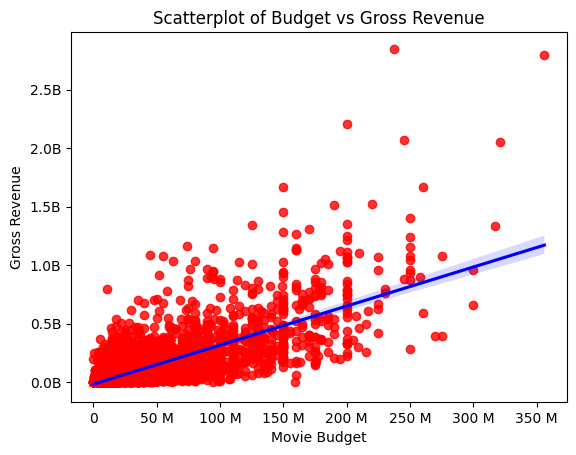

In [100]:
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import StrMethodFormatter
sns.regplot(x = 'budget', y = 'gross_revenue', data = df,
            scatter_kws={"color": "red"}, line_kws={'color' : 'blue'})

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

ax = plt.gca()
ax.xaxis.set_major_formatter(EngFormatter(unit=''))
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: '{:,}'.format(x/1000000000) + 'B'))
plt.title('Scatterplot of Budget vs Gross Revenue')

plt.xlabel('Movie Budget')

plt.ylabel('Gross Revenue')



In [101]:
pd.options.display.float_format = '{:20,.5f}'.format

df.corr(method = 'pearson') #pearson, kendall, spearman

<ipython-input-101-4b51f105a84e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, spearman


,score,votes,budget,gross_revenue,runtime,yearcorrect
score,1.00000,0.47426,0.07200,0.22256,0.41407,0.06192
votes,0.47426,1.00000,0.43968,0.61475,0.35230,0.20310
budget,0.07200,0.43968,1.00000,0.74025,0.31870,0.32031
gross_revenue,0.22256,0.61475,0.74025,1.00000,0.27580,0.26872
runtime,0.41407,0.35230,0.31870,0.27580,1.00000,0.07529
yearcorrect,0.06192,0.20310,0.32031,0.26872,0.07529,1.00000


<ipython-input-102-5127a38157c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


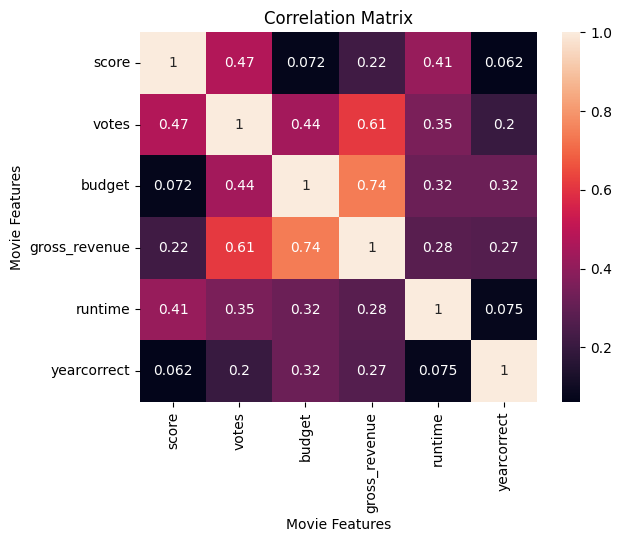

In [102]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

The heatmap above displays the correlation between the movie features.


Dark colors indicate low correlation while lighter colors indicate higher correlation.


Gross Revenue and Budget have the highest correlation of 0.74


